<a href="https://colab.research.google.com/github/reni-hristova/Classification-Fashion-MNIST/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"Import and rename libraries needed for all models"
import tensorflow as tf
import numpy as np

import math
import matplotlib.pyplot as plt

## Import Keras dataset

In [ ]:
# Import Fashion MNIST dataset from Keras 
(train_set, train_labels), (test_set, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocessing

In [ ]:
# Normalise the values in the images to be between 0 and 1 (Normally the range is 0, 255)
train_set = train_set / 255.0
test_set = test_set / 255.0

# Visualisation

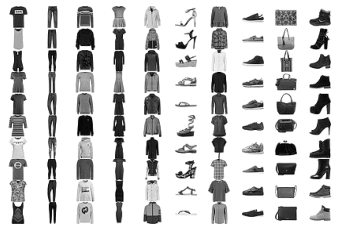

In [ ]:
# Visualisation
fig, ax = plt.subplots(10,10)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(10):
    t = train_set[train_labels==i,:,:][0:10,:,:]
    for j in range(10):
        ax[j,i].imshow(t[j,:,:], cmap=plt.cm.binary)
        ax[j,i].set_axis_off()
plt.savefig('mnist-10x10.pdf')

In [ ]:
fig, ax = plt.subplots(10,1,figsize=[4,6])
plt.subplots_adjust(wspace=0, hspace=0.1)
for i in range(10):
    t = np.random.permutation(train_set[train_labels==i,:,:])
    im = []
    for j in range(100):
        im.append(np.squeeze(np.reshape(t[j,:,:],(1,-1))))
    im = np.array(im)
    ax[i].imshow(np.array(im), cmap=plt.cm.binary)
    ax[i].set_axis_off()
plt.savefig('mnist-vectorised.pdf')

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# SVM - SK Learn

In [ ]:
# Change the dimentions of the data - KNN?
test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel = 'poly')
""" SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear/poly/sigmoid/rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
"""
classifier.decision_function_shape = "ovr"
classifier.fit(train_set, train_labels)

# Evaluation

In [ ]:
# Predict labels for the test set
predicted_labels = classifier.predict(test_set)

# Evaluation of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\n Classification Report\n", classification_report(test_labels, predicted_labels))
print("\n Confusion Matrix\n", confusion_matrix(test_labels, predicted_labels))
print("\n Accuracy score\n", accuracy_score(test_labels, predicted_labels))

# Linear SVC with Nystroem

In [ ]:
from sklearn import svm
from sklearn.kernel_approximation import Nystroem

clf = svm.LinearSVC()
feature_map_nystroem = Nystroem(gamma=.02)
data_transformed = feature_map_nystroem.fit_transform(train_set)
clf.fit(data_transformed, train_labels)

clf.score(data_transformed, train_labels)

0.87365

In [ ]:
# Predict labels for the test set
predicted_labels = clf.predict(test_set)

# Evaluation of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\n Classification Report\n", classification_report(test_labels, predicted_labels))
print("\n Confusion Matrix\n", confusion_matrix(test_labels, predicted_labels))
print("\n Accuracy score\n", accuracy_score(test_labels, predicted_labels))


 Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.01      0.00      0.00      1000
           7       0.07      0.06      0.07      1000
           8       0.00      0.00      0.00      1000
           9       0.11      0.99      0.21      1000

    accuracy                           0.11     10000
   macro avg       0.02      0.11      0.03     10000
weighted avg       0.02      0.11      0.03     10000


 Confusion Matrix
 [[  0   0   9   0   1   0   4  91   0 895]
 [  0   0  19   0   9   0   2 177   0 793]
 [  0   0   0   0   1   0   1   8   0 990]
 [  1   0  22   0   4   0   2 289   0 682]
 [  0   0   4   0   0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
